Mounted at /content/drive
PROJECT_ROOT: /content/drive/MyDrive/aerial_project
CLASSIFICATION_DIR exists: True
DETECTION_DIR exists: True
SAVED_MODELS exists: True
RESULTS_DIR exists: True
Found 215 files belonging to 2 classes.



==================== Custom CNN ====================
              precision    recall  f1-score   support

        bird       0.85      0.80      0.83       121
       drone       0.76      0.82      0.79        94

    accuracy                           0.81       215
   macro avg       0.81      0.81      0.81       215
weighted avg       0.81      0.81      0.81       215

Accuracy: 0.8093, Precision: 0.7624, Recall: 0.8191, F1: 0.7897


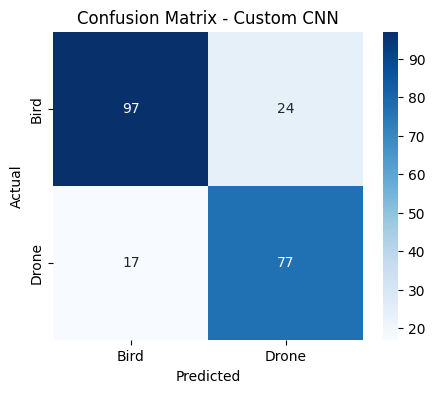


==================== EfficientNet ====================
              precision    recall  f1-score   support

        bird       0.00      0.00      0.00       121
       drone       0.43      0.97      0.59        94

    accuracy                           0.42       215
   macro avg       0.21      0.48      0.30       215
weighted avg       0.19      0.42      0.26       215

Accuracy: 0.4233, Precision: 0.4292, Recall: 0.9681, F1: 0.5948


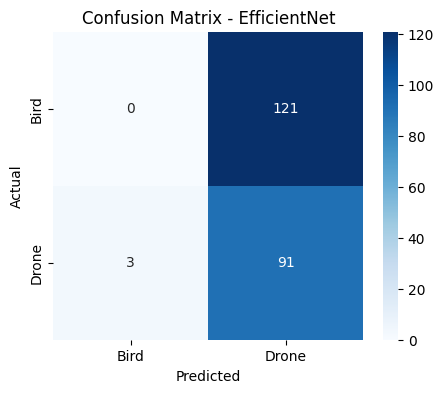

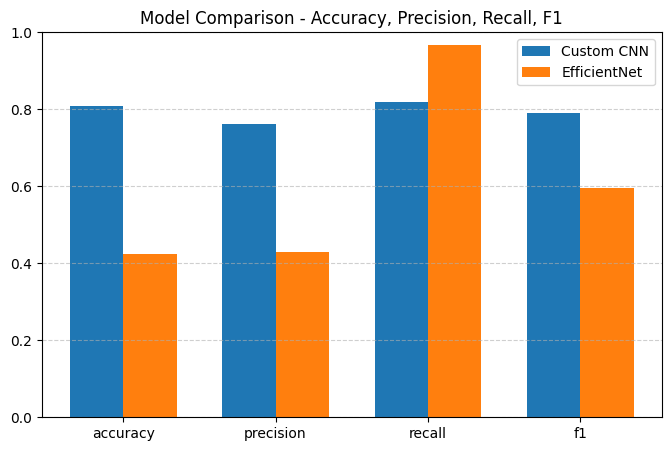


Best performing model: Custom CNN (F1 = 0.7897)

Evaluation complete. Models compared successfully.


In [ ]:
#Colab: 05_evaluate.ipynb
#purpose=
#evaluating saved models (Custom CNN & EfficientNet)
#generating classification reports and confusion matrices
#plottin and compare Accuracy, Precision, Recall, and F1 scores

from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

#Project Paths Setup
PROJECT_ROOT = '/content/drive/MyDrive/aerial_project'
CLASSIFICATION_DIR = os.path.join(PROJECT_ROOT, 'classification_dataset')
DETECTION_DIR = os.path.join(PROJECT_ROOT, 'object_detection_Dataset')
SAVED_MODELS = os.path.join(PROJECT_ROOT, 'saved_models')
RESULTS_DIR = os.path.join(PROJECT_ROOT, 'results')

# Create results and model folders if missing
os.makedirs(SAVED_MODELS, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("CLASSIFICATION_DIR exists:", os.path.exists(CLASSIFICATION_DIR))
print("DETECTION_DIR exists:", os.path.exists(DETECTION_DIR))
print("SAVED_MODELS exists:", os.path.exists(SAVED_MODELS))
print("RESULTS_DIR exists:", os.path.exists(RESULTS_DIR))

# ================================================
# Load Test Dataset
# ================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Point directly to your classification_dataset/test folder
test_path = os.path.join(CLASSIFICATION_DIR, 'test')

if not os.path.exists(test_path):
    raise FileNotFoundError(f"Test dataset not found at: {test_path}")

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
).prefetch(tf.data.AUTOTUNE)

# ================================================
# Helper Function - Predictions
# ================================================
def get_preds(model, dataset):
    """Return true and predicted labels from model and dataset."""
    y_true, y_pred = [], []
    for x, y in dataset:
        preds = model.predict(x, verbose=0)
        preds = np.argmax(preds, axis=1)
        y_pred.extend(preds.tolist())
        y_true.extend(y.numpy().tolist())
    return np.array(y_true), np.array(y_pred)

# ================================================
# Load Trained Models
# ================================================
custom_path = os.path.join(SAVED_MODELS, 'best_custom_cnn.h5')
eff_path = os.path.join(SAVED_MODELS, 'best_efficientnet_full.h5')

if not os.path.exists(custom_path):
    raise FileNotFoundError("Custom CNN model file not found at: " + custom_path)
if not os.path.exists(eff_path):
    raise FileNotFoundError("EfficientNet model file not found at: " + eff_path)

custom_model = tf.keras.models.load_model(custom_path)
eff_model = tf.keras.models.load_model(eff_path)

models = {
    'Custom CNN': custom_model,
    'EfficientNet': eff_model
}

# ================================================
# Evaluate Each Model
# ================================================
results = {}

for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    y_true, y_pred = get_preds(model, test_ds)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }

    # Classification report
    print(classification_report(y_true, y_pred, target_names=['bird', 'drone']))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Bird', 'Drone'], yticklabels=['Bird', 'Drone'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ================================================
# Compare Metrics Across Models
# ================================================
plt.figure(figsize=(8, 5))
metrics = ['accuracy', 'precision', 'recall', 'f1']
x = np.arange(len(metrics))
width = 0.35

for i, (name, vals) in enumerate(results.items()):
    plt.bar(x + i * width, [vals[m] for m in metrics], width, label=name)

plt.xticks(x + width / 2, metrics)
plt.ylim(0, 1)
plt.title("Model Comparison - Accuracy, Precision, Recall, F1")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Final Summary
best_model=max(results, key=lambda k: results[k]['f1'])
print(f"\nBest performing model: {best_model} (F1 = {results[best_model]['f1']:.4f})")
print("\nEvaluation complete. Models compared successfully.")

In [3]:
import os
os.listdir('/content/drive/MyDrive/aerial_project/saved_models')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/aerial_project/saved_models'